In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dataset = pd.read_csv('drive/My Drive/BCML/bottle.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
dataset.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,864863.000000,853900.000000,23127.000000,817509.000000,74914.000000,673755.000000,184676.000000,65823.00000,217797.000000,225272.000000,639166.000000,225271.000000,639170.000000,413317.000000,451786.000000,354091.000000,510866.000000,337576.000000,529474.000000,337403.000000,529933.000000,64962.000000,808299.000000,14432.000000,12760.000000,848605.000000,14414.000000,12742.000000,848623.000000,22649.000000,20457.000000,840440.000000,22650.000000,20457.000000,840439.000000,18651.000000,864863.000000,853900.000000,818816.000000,817509.000000,812007.000000,812092.000000,818206.000000,696201.000000,666448.000000,354099.000000,413325.000000,337411.000000,337584.000000,64982.000000,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,4.700273,2.017148,7.471829,2.716787,7.945057,8.999996,8.755615,8.46701,8.793487,0.450185,8.999848,0.198553,8.999844,1.564747,8.999320,26.606587,8.999687,0.042316,8.995458,17.302247,8.993122,0.084877,8.947668,9.757704,1.266928,8.999992,9.762613,1.267776,8.999992,0.155295,1.993450,8.999992,8.393530,1.256587,8.999992,18.356509,226.832495,10.799697,10.842295,33.840295,25.811010,220.938918,0.431763,3.392498,57.192940,26.606862,1.564736,17.302188,0.042336,0.084851,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587267,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,1.877428,0.148498,1.483097,0.450559,1.415355,0.003655,0.810973,1.11778,0.892111,1.208570,0.012318,0.376543,0.012507,1.035966,0.026895,27.648190,0.018768,0.104196,0.077426,14.581958,0.131516,0.273061,0.508844,23.983492,0.442372,0.002872,25.064529,0.442817,0.002872,0.224953,0.080671,0.002886,21.516374,0.436760,0.002886,29.852839,316.050007,4.243829,4.236435,0.462978,1.124645,93.483703,0.382336,2.073271,37.060537,27.648403,1.035973,14.581998,0.104201,0.273022,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,3.000000,1.000000,6.000000,2.000000,6.000000,6.000000,6.000000,6.00000,2.000000,-0.001000,8.000000,-3.890000,8.000000,0.000000,4.000000,0.000000,4.000000,0.000000,4.000000,-0.400000,4.000000,0.000000,4.000000,-0.240000,1.000000,8.000000,-0.200000,1.000000,8.000000,-0.010000,1.000000,8.000000,-0.220000,1.000000,8.000000,0.000000,0.000000,1.440000,0.000000,4.570000,20.934000,0.400000,0.000000,-0.010000,-0.100000,0.000000,0.000000,-0.400000,0.000000,0.000000,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,3.000000,2.000000,6.000000,2.000000,6.000000,9.000000,9.000000,9.00000,9.000000,0.050000,9.000000,0.050000,9.000000,0.470000,9.000000,3.110000,9.000000,0.000000,9.000000,0.600000,9.000000,0.000000,9.000000,0.930000,1.000000,9.000000,0.930000,1.000000,9.000000,0.060000,2.000000,9.000000,0.980000,1.000000,9.000000,0.280000,46.000000,7.680000,7.740000,33.488000,24.960000,143.700000,0.130000,1.360000,21.200000,3.100000,0.470000,0.600000,0.000000,0.000000,

In [4]:
dataset.tail()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,IncTim,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
864858,34404,864859,093.4 026.4,20-1611SR-MX-310-2239-09340264-0000A-7,0,18.744,33.4083,5.805,23.87055,108.74,253.47,NaN,7,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,0.905,NaN,0.176,NaN,0.22,NaN,1.77,NaN,0.029,NaN,0.10,NaN,0.02,NaN,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,0.0,18.74,18.74,33.408,23.871,402.4,0.000,5.81,108.7,1.8,0.22,0.1,0.03,0.02,0.91,0.18,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864859,34404,864860,093.4 026.4,20-1611SR-MX-310-2239-09340264-0002A-3,2,18.744,33.4083,5.805,23.87072,108.74,253.47,4.0,3,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,0.905,NaN,0.176,NaN,0.22,NaN,1.77,NaN,0.029,NaN,0.10,NaN,0.00,4.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,2.0,18.74,18.74,33.408,23.871,402.5,0.008,5.81,108.7,1.8,0.22,0.1,0.03,0.00,0.91,0.18,2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864860,34404,864861,093.4 026.4,20-1611SR-MX-310-2239-09340264-0005A-3,5,18.692,33.4150,5.796,23.88911,108.46,253.06,3.0,3,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,0.915,NaN,0.182,NaN,0.20,NaN,1.75,NaN,0.027,NaN,0.09,NaN,0.00,4.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,5.0,18.69,18.69,33.415,23.889,400.8,0.020,5.80,108.5,1.8,0.20,0.1,0.03,0.00,0.92,0.18,5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864861,34404,864862,093.4 026.4,20-1611SR-MX-310-2239-09340264-0010A-3,10,18.161,33.4062,5.816,24.01426,107.74,253.92,2.0,3,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,1.078,NaN,0.313,NaN,0.25,NaN,1.99,NaN,0.030,NaN,0.11,NaN,0.12,NaN,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,10.0,18.16,18.16,33.406,24.014,389.1,0.040,5.82,107.7,2.0,0.25,0.1,0.03,0.12,1.08,0.31,10,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864862,34404,864863,093.4 026.4,20-1611SR-MX-310-2239-09340264-0015A-3,15,17.533,33.3880,5.774,24.15297,105.66,252.08,1.0,3,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,2.118,NaN,0.614,NaN,0.31,NaN,2.58,NaN,0.054,NaN,0.14,NaN,0.07,NaN,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,15.0,17.53,17.53,33.388,24.153,376.0,0.059,5.77,105.7,2.6,0.31,0.1,0.05,0.07,2.12,0.61,15,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

In [6]:
# Data Cleaning
# Replace nilai "?" dengan None

dataset.replace("?", np.nan, inplace=True)


In [7]:
dataset.isnull()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,IncTim,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,False,False,False,False,False,False,False,True,False,True,True,True,False,False,True,False,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,True,False,True,True,False,True,True,False,True,True,False,True,True,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,True,False,True,True,True,False,False,True,False,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,True,False,True,True,False,True,True,False,True,True,False,True,True,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,True,False,True,True,True,False,False,True,False,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,True,False,True,True,False,True,True,False,True,True,False,True,True,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,True,False,True,True,True,False,False,True,False,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,True,False,True,True,False,True,True,False,True,True,False,True,True,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,True,False,True,True,True,False,False,True,False,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,True,False,True,True,False,True,True,False,True,True,False,True,True,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,True,True,True,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,True,True,False,True,True,False,True,True,False,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True
864859,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,True,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True,True,False,True,True,False,True,True,False,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True
864860,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,True,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True,True,False,True,True,False,True,True,False,True,True,False,True,True,False,False,False,False,False,False,Fal

In [8]:
dataset.isnull().sum()

Cst_Cnt                     0
Btl_Cnt                     0
Sta_ID                      0
Depth_ID                    0
Depthm                      0
                        ...  
TA1                    862779
TA2                    864629
pH2                    864853
pH1                    864779
DIC Quality Comment    864808
Length: 74, dtype: int64

In [9]:
dataset.isnull().sum()

Cst_Cnt                     0
Btl_Cnt                     0
Sta_ID                      0
Depth_ID                    0
Depthm                      0
                        ...  
TA1                    862779
TA2                    864629
pH2                    864853
pH1                    864779
DIC Quality Comment    864808
Length: 74, dtype: int64

In [10]:
dataset.drop(['R_SIO3', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment', 'DIC2', 'DIC1', 'R_SAMP', 'R_PHAEO', 'R_NO3', 'R_NO2', 'R_NH4', 'R_CHLA', 'R_PO4', 'LightP', 'IncTim', 'MeanAp', 'MeanAs', 'DarkAp', 'DarkAs', 'C14A2p', 'C14As2', 'C14A1p', 'C14As1', 'NH3uM', 'NO3uM', 'NO2uM', 'SiO3uM', 'PO4uM', 'Phaeop', 'ChlorA', 'O2Satq', 'SThtaq', 'O_qual', 'S_qual', 'T_qual', 'BtlNum'], axis=1, inplace=True)
dataset.isnull().sum()

Cst_Cnt             0
Btl_Cnt             0
Sta_ID              0
Depth_ID            0
Depthm              0
T_degC          10963
Salnty          47354
O2ml_L         168662
STheta          52689
O2Sat          203589
Oxy_µmol/Kg    203595
RecInd              0
T_prec          10963
S_prec          47354
P_qual         191108
Chlqua         225697
Phaqua         225693
PO4q           413077
SiO3qu         353997
NO2q           335389
NO3q           334930
NH3q            56564
C14A1q          16258
C14A2q          16240
DarkAq          24423
MeanAq          24424
R_Depth             0
R_TEMP          10963
R_POTEMP        46047
R_SALINITY      47354
R_SIGMA         52856
R_SVA           52771
R_DYNHT         46657
R_O2           168662
R_O2Sat        198415
R_PRES              0
dtype: int64

In [11]:
dataset.dtypes

Cst_Cnt          int64
Btl_Cnt          int64
Sta_ID          object
Depth_ID        object
Depthm           int64
T_degC         float64
Salnty         float64
O2ml_L         float64
STheta         float64
O2Sat          float64
Oxy_µmol/Kg    float64
RecInd           int64
T_prec         float64
S_prec         float64
P_qual         float64
Chlqua         float64
Phaqua         float64
PO4q           float64
SiO3qu         float64
NO2q           float64
NO3q           float64
NH3q           float64
C14A1q         float64
C14A2q         float64
DarkAq         float64
MeanAq         float64
R_Depth        float64
R_TEMP         float64
R_POTEMP       float64
R_SALINITY     float64
R_SIGMA        float64
R_SVA          float64
R_DYNHT        float64
R_O2           float64
R_O2Sat        float64
R_PRES           int64
dtype: object

In [12]:
dataset.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,RecInd,T_prec,S_prec,P_qual,Chlqua,Phaqua,PO4q,SiO3qu,NO2q,NO3q,NH3q,C14A1q,C14A2q,DarkAq,MeanAq,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_PRES
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,NaN,3,1.0,2.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,0.0,10.50,10.50,33.440,25.64,233.0,0.00,NaN,NaN,0
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,NaN,3,2.0,2.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,8.0,10.46,10.46,33.440,25.65,232.5,0.01,NaN,NaN,8
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,NaN,7,2.0,3.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,10.0,10.46,10.46,33.437,25.65,232.8,0.02,NaN,NaN,10
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,NaN,3,2.0,2.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,19.0,10.45,10.45,33.420,25.64,234.1,0.04,NaN,NaN,19
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,NaN,7,2.0,3.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,20.0,10.45,10.45,33.421,25.64,234.0,0.04,NaN,NaN,20


In [13]:
dataset['Sta_ID'].value_counts()

090.0 045.0    10043
090.0 070.0    10039
090.0 037.0     9771
090.0 060.0     9521
080.0 060.0     9393
               ...  
065.0 055.0        1
085.0 065.0        1
106.0 040.0        1
094.0 028.0        1
101.0 035.0        1
Name: Sta_ID, Length: 2634, dtype: int64

In [14]:
dataset['Depth_ID'].value_counts()

20-16045S-MX-110-2018-06330900-0010A-3    2
20-16045S-MX-110-1421-06670900-0003A-3    2
20-16045S-MX-110-2018-06330900-0025A-3    2
20-16045S-MX-110-2018-06330900-0102A-3    2
20-16045S-MX-110-1421-06670900-0026A-3    2
                                         ..
19-6107HO-HY-181-0706-08000520-0030A-7    1
19-5810ST-HY-302-2242-07330550-0007A-3    1
19-9808QU-MX-227-0144-09000900-0125A-3    1
19-6707EB-CT-199-0224-12670600-0030A-5    1
19-8709NM-HY-253-0521-09000450-0200A-7    1
Name: Depth_ID, Length: 864850, dtype: int64

In [15]:
dataset.drop(['Sta_ID', 'Depth_ID'], axis=1, inplace=True)

In [16]:
dataset.head()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,RecInd,T_prec,S_prec,P_qual,Chlqua,Phaqua,PO4q,SiO3qu,NO2q,NO3q,NH3q,C14A1q,C14A2q,DarkAq,MeanAq,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_PRES
0,1,1,0,10.50,33.440,NaN,25.649,NaN,NaN,3,1.0,2.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,0.0,10.50,10.50,33.440,25.64,233.0,0.00,NaN,NaN,0
1,1,2,8,10.46,33.440,NaN,25.656,NaN,NaN,3,2.0,2.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,8.0,10.46,10.46,33.440,25.65,232.5,0.01,NaN,NaN,8
2,1,3,10,10.46,33.437,NaN,25.654,NaN,NaN,7,2.0,3.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,10.0,10.46,10.46,33.437,25.65,232.8,0.02,NaN,NaN,10
3,1,4,19,10.45,33.420,NaN,25.643,NaN,NaN,3,2.0,2.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,19.0,10.45,10.45,33.420,25.64,234.1,0.04,NaN,NaN,19
4,1,5,20,10.45,33.421,NaN,25.643,NaN,NaN,7,2.0,3.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,20.0,10.45,10.45,33.421,25.64,234.0,0.04,NaN,NaN,20


In [17]:
dataset.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,RecInd,T_prec,S_prec,P_qual,Chlqua,Phaqua,PO4q,SiO3qu,NO2q,NO3q,NH3q,C14A1q,C14A2q,DarkAq,MeanAq,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_PRES
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,864863.000000,853900.000000,817509.000000,673755.000000,639166.000000,639170.000000,451786.000000,510866.000000,529474.000000,529933.000000,808299.000000,848605.000000,848623.000000,840440.000000,840439.000000,864863.000000,853900.000000,818816.000000,817509.000000,812007.000000,812092.000000,818206.000000,696201.000000,666448.000000,864863.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,4.700273,2.017148,2.716787,8.999996,8.999848,8.999844,8.999320,8.999687,8.995458,8.993122,8.947668,8.999992,8.999992,8.999992,8.999992,226.832495,10.799697,10.842295,33.840295,25.811010,220.938918,0.431763,3.392498,57.192940,228.395694
std,10240.949817,249664.587267,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,1.877428,0.148498,0.450559,0.003655,0.012318,0.012507,0.026895,0.018768,0.077426,0.131516,0.508844,0.002872,0.002872,0.002886,0.002886,316.050007,4.243829,4.236435,0.462978,1.124645,93.483703,0.382336,2.073271,37.060537,319.456731
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,3.000000,1.000000,2.000000,6.000000,8.000000,8.000000,4.000000,4.000000,4.000000,4.000000,4.000000,8.000000,8.000000,8.000000,8.000000,0.000000,1.440000,0.000000,4.570000,20.934000,0.400000,0.000000,-0.010000,-0.100000,0.000000
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,3.000000,2.000000,2.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,46.000000,7.680000,7.740000,33.488000,24.960000,143.700000,0.130000,1.360000,21.200000,46.000000
50%,16848.000000,432432.000000,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,3.000000,2.000000,3.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,125.000000,10.060000,10.100000,33.863000,25.990000,203.200000,0.340000,3.440000,54.500000,126.000000
75%,26557.000000,648647.500000,300.000000,13.880000,34.196900,5.500000,26.646000,97.600000,240.379600,7.000000,2.000000,3.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,300.000000,13.880000,13.920000,34.196000,26.640000,299.800000,0.640000,5.500000,97.600000,302.000000
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,7.000000,3.000000,3.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,5351.000000,31.140000,31.140000,37.034000,250.784000,683.400000,3.880000,11.130000,214.100000,5458.000000


In [18]:
dataset.isnull().sum()

Cst_Cnt             0
Btl_Cnt             0
Depthm              0
T_degC          10963
Salnty          47354
O2ml_L         168662
STheta          52689
O2Sat          203589
Oxy_µmol/Kg    203595
RecInd              0
T_prec          10963
S_prec          47354
P_qual         191108
Chlqua         225697
Phaqua         225693
PO4q           413077
SiO3qu         353997
NO2q           335389
NO3q           334930
NH3q            56564
C14A1q          16258
C14A2q          16240
DarkAq          24423
MeanAq          24424
R_Depth             0
R_TEMP          10963
R_POTEMP        46047
R_SALINITY      47354
R_SIGMA         52856
R_SVA           52771
R_DYNHT         46657
R_O2           168662
R_O2Sat        198415
R_PRES              0
dtype: int64

In [22]:
avg_R_O2Sat = dataset['R_O2Sat'].astype('float').mean(axis=0)
avg_R_O2 = dataset['R_O2'].astype('float').mean(axis=0)
avg_R_DYNHT = dataset['R_DYNHT'].astype('float').mean(axis=0)
avg_R_SVA = dataset['R_SVA'].astype('float').mean(axis=0)
avg_R_SIGMA = dataset['R_SIGMA'].astype('float').mean(axis=0)
avg_R_SALINITY = dataset['R_SALINITY'].astype('float').mean(axis=0)
avg_R_POTEMP = dataset['R_POTEMP'].astype('float').mean(axis=0)
avg_R_TEMP = dataset['R_TEMP'].astype('float').mean(axis=0)

avg_MeanAq  = dataset['MeanAq'].astype('float').mean(axis=0)
avg_DarkAq = dataset['DarkAq'].astype('float').mean(axis=0)
avg_C14A2q = dataset['C14A2q'].astype('float').mean(axis=0)
avg_C14A1q = dataset['C14A1q'].astype('float').mean(axis=0)
avg_NH3q = dataset['NH3q'].astype('float').mean(axis=0)
avg_NO3q = dataset['NO3q'].astype('float').mean(axis=0)
avg_NO2q = dataset['NO2q'].astype('float').mean(axis=0)
avg_SiO3qu = dataset['SiO3qu'].astype('float').mean(axis=0)
avg_PO4q = dataset['PO4q'].astype('float').mean(axis=0)

avg_Phaqua = dataset['Phaqua'].astype('float').mean(axis=0)
avg_Chlqua = dataset['Chlqua'].astype('float').mean(axis=0)
avg_P_qual = dataset['P_qual'].astype('float').mean(axis=0)
avg_S_prec = dataset['S_prec'].astype('float').mean(axis=0)
avg_T_prec = dataset['T_prec'].astype('float').mean(axis=0)
avg_Oxy_µmol = dataset['Oxy_µmol/Kg'].astype('float').mean(axis=0)
avg_O2Sat = dataset['O2Sat'].astype('float').mean(axis=0)
avg_STheta = dataset['STheta'].astype('float').mean(axis=0)
avg_O2ml_L = dataset['O2ml_L'].astype('float').mean(axis=0)
avg_Salnty = dataset['Salnty'].astype('float').mean(axis=0)

avg_Salnty

33.84035029388088

In [23]:
dataset["R_O2Sat"].replace(np.nan, avg_R_O2Sat, inplace=True)
dataset["R_O2"].replace(np.nan, avg_R_O2, inplace=True)
dataset["R_DYNHT"].replace(np.nan, avg_R_DYNHT, inplace=True)
dataset["R_SVA"].replace(np.nan, avg_R_SVA, inplace=True)
dataset["R_SIGMA"].replace(np.nan, avg_R_SIGMA, inplace=True)

dataset["R_SALINITY"].replace(np.nan, avg_R_SALINITY, inplace=True)
dataset["R_POTEMP"].replace(np.nan, avg_R_POTEMP, inplace=True)
dataset["R_TEMP"].replace(np.nan, avg_R_TEMP, inplace=True)
dataset["MeanAq"].replace(np.nan, avg_MeanAq, inplace=True)
dataset["DarkAq"].replace(np.nan, avg_DarkAq, inplace=True)

dataset["C14A2q"].replace(np.nan, avg_C14A2q, inplace=True)
dataset["C14A1q"].replace(np.nan, avg_C14A1q, inplace=True)
dataset["NH3q"].replace(np.nan, avg_NH3q, inplace=True)
dataset["NO3q"].replace(np.nan, avg_NO3q, inplace=True)
dataset["NO2q"].replace(np.nan, avg_NO2q, inplace=True)

dataset["SiO3qu"].replace(np.nan, avg_SiO3qu, inplace=True)
dataset["PO4q"].replace(np.nan, avg_PO4q, inplace=True)
dataset["Phaqua"].replace(np.nan, avg_Phaqua, inplace=True)
dataset["Chlqua"].replace(np.nan, avg_Chlqua, inplace=True)
dataset["P_qual"].replace(np.nan, avg_P_qual, inplace=True)

dataset["S_prec"].replace(np.nan, avg_S_prec, inplace=True)
dataset["T_prec"].replace(np.nan, avg_T_prec, inplace=True)
dataset["Oxy_µmol/Kg"].replace(np.nan, avg_Oxy_µmol, inplace=True)
dataset["O2Sat"].replace(np.nan, avg_O2Sat, inplace=True)
dataset["STheta"].replace(np.nan, avg_STheta, inplace=True)

dataset["Salnty"].replace(np.nan, avg_Salnty, inplace=True)
dataset["O2ml_L"].replace(np.nan, avg_O2ml_L, inplace=True)

In [24]:
dataset.isnull().sum()

Cst_Cnt            0
Btl_Cnt            0
Depthm             0
T_degC         10963
Salnty             0
O2ml_L             0
STheta             0
O2Sat              0
Oxy_µmol/Kg        0
RecInd             0
T_prec             0
S_prec             0
P_qual             0
Chlqua             0
Phaqua             0
PO4q               0
SiO3qu             0
NO2q               0
NO3q               0
NH3q               0
C14A1q             0
C14A2q             0
DarkAq             0
MeanAq             0
R_Depth            0
R_TEMP             0
R_POTEMP           0
R_SALINITY         0
R_SIGMA            0
R_SVA              0
R_DYNHT            0
R_O2               0
R_O2Sat            0
R_PRES             0
dtype: int64

In [25]:
# Drop data null pada T_degC
dataset.dropna(subset=["T_degC"], axis=0, inplace=True)
dataset.isnull().sum()

Cst_Cnt        0
Btl_Cnt        0
Depthm         0
T_degC         0
Salnty         0
O2ml_L         0
STheta         0
O2Sat          0
Oxy_µmol/Kg    0
RecInd         0
T_prec         0
S_prec         0
P_qual         0
Chlqua         0
Phaqua         0
PO4q           0
SiO3qu         0
NO2q           0
NO3q           0
NH3q           0
C14A1q         0
C14A2q         0
DarkAq         0
MeanAq         0
R_Depth        0
R_TEMP         0
R_POTEMP       0
R_SALINITY     0
R_SIGMA        0
R_SVA          0
R_DYNHT        0
R_O2           0
R_O2Sat        0
R_PRES         0
dtype: int64

In [26]:
dataset.dtypes

Cst_Cnt          int64
Btl_Cnt          int64
Depthm           int64
T_degC         float64
Salnty         float64
O2ml_L         float64
STheta         float64
O2Sat          float64
Oxy_µmol/Kg    float64
RecInd           int64
T_prec         float64
S_prec         float64
P_qual         float64
Chlqua         float64
Phaqua         float64
PO4q           float64
SiO3qu         float64
NO2q           float64
NO3q           float64
NH3q           float64
C14A1q         float64
C14A2q         float64
DarkAq         float64
MeanAq         float64
R_Depth        float64
R_TEMP         float64
R_POTEMP       float64
R_SALINITY     float64
R_SIGMA        float64
R_SVA          float64
R_DYNHT        float64
R_O2           float64
R_O2Sat        float64
R_PRES           int64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6f8715a20>,
      dtype=object)

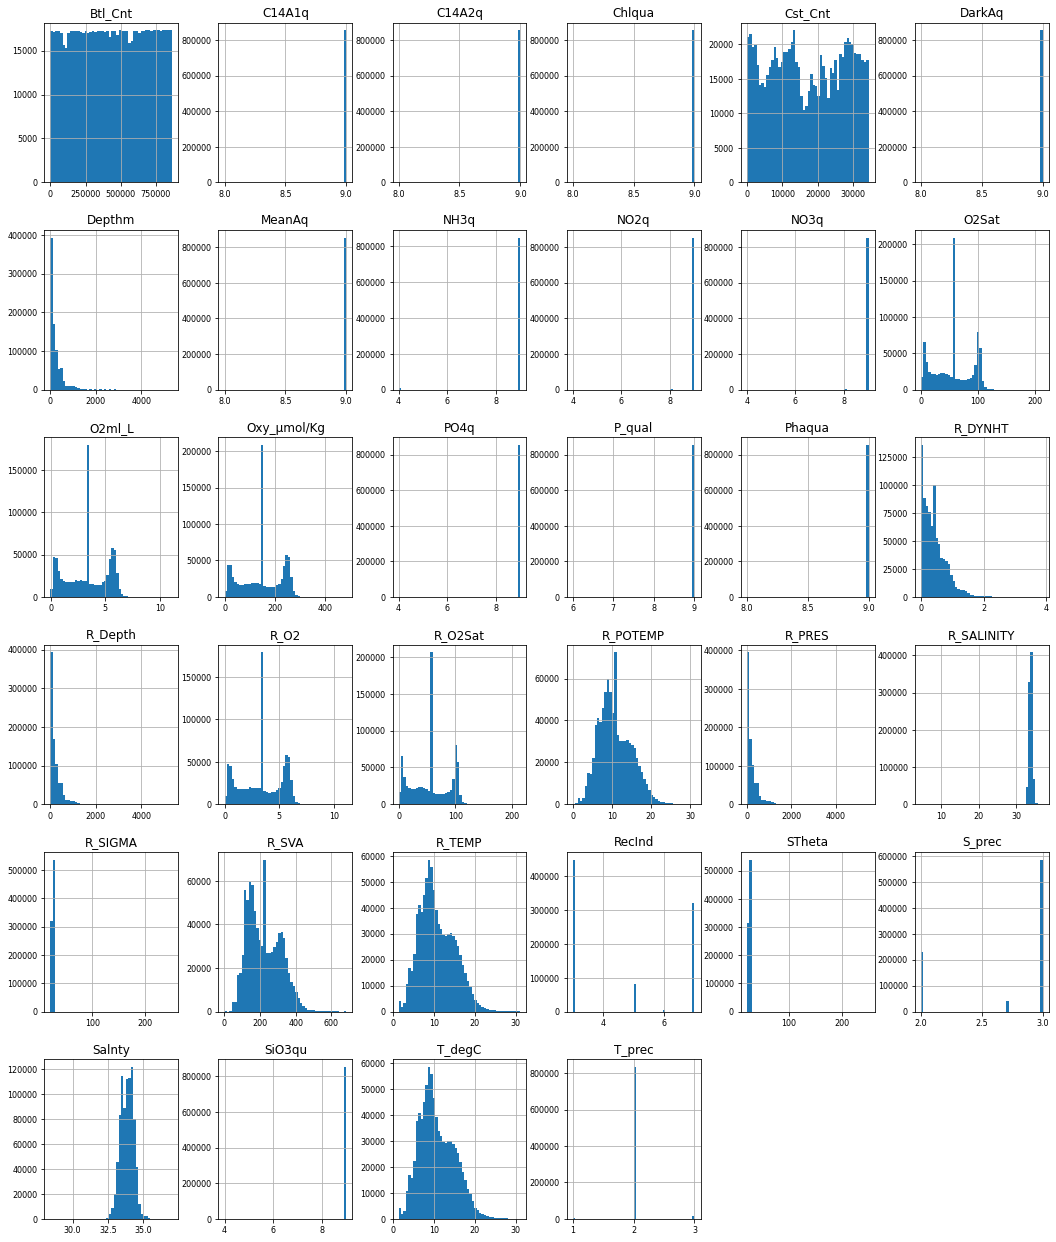

In [27]:
dataset_numbers = dataset.select_dtypes(include=['float64'])
dataset.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)

In [30]:
# Pindah Ke Index 0
col_name="T_degC"
temp = dataset.pop(col_name)

dataset.insert(0, col_name, temp)

In [32]:
dataset.head()

,T_degC,Cst_Cnt,Btl_Cnt,Depthm,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,RecInd,T_prec,S_prec,P_qual,Chlqua,Phaqua,PO4q,SiO3qu,NO2q,NO3q,NH3q,C14A1q,C14A2q,DarkAq,MeanAq,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_PRES
0,10.50,1,1,0,33.440,3.392468,25.649,57.103779,148.808694,3,1.0,2.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,0.0,10.50,10.50,33.440,25.64,233.0,0.00,3.392498,57.19294,0
1,10.46,1,2,8,33.440,3.392468,25.656,57.103779,148.808694,3,2.0,2.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,8.0,10.46,10.46,33.440,25.65,232.5,0.01,3.392498,57.19294,8
2,10.46,1,3,10,33.437,3.392468,25.654,57.103779,148.808694,7,2.0,3.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,10.0,10.46,10.46,33.437,25.65,232.8,0.02,3.392498,57.19294,10
3,10.45,1,4,19,33.420,3.392468,25.643,57.103779,148.808694,3,2.0,2.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,19.0,10.45,10.45,33.420,25.64,234.1,0.04,3.392498,57.19294,19
4,10.45,1,5,20,33.421,3.392468,25.643,57.103779,148.808694,7,2.0,3.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,20.0,10.45,10.45,33.421,25.64,234.0,0.04,3.392498,57.19294,20


In [31]:
dataset.corr()['T_degC'][1:]

Cst_Cnt        0.089329
Btl_Cnt        0.090118
Depthm        -0.681201
Salnty        -0.491168
O2ml_L         0.715195
STheta        -0.804295
O2Sat          0.745131
Oxy_µmol/Kg    0.696899
RecInd        -0.066507
T_prec        -0.041076
S_prec        -0.035130
P_qual        -0.000570
Chlqua        -0.005700
Phaqua        -0.005920
PO4q          -0.000317
SiO3qu        -0.000218
NO2q          -0.013234
NO3q          -0.056861
NH3q           0.000991
C14A1q        -0.004126
C14A2q        -0.004126
DarkAq        -0.004003
MeanAq        -0.004149
R_Depth       -0.681200
R_TEMP         1.000000
R_POTEMP       0.973582
R_SALINITY    -0.489898
R_SIGMA       -0.836170
R_SVA          0.935155
R_DYNHT       -0.775452
R_O2           0.715195
R_O2Sat        0.744909
R_PRES        -0.679852
Name: T_degC, dtype: float64

In [35]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PowerTransformer, QuantileTransformer, MinMaxScaler, MaxAbsScaler, RobustScaler

scalr = (preprocessing.StandardScaler(), preprocessing.PowerTransformer(method='yeo-johnson'), preprocessing.QuantileTransformer(), preprocessing.MinMaxScaler(), preprocessing.MaxAbsScaler(), preprocessing.RobustScaler())
for index, value in enumerate(scalr):
  scaler = value
  label = dataset['T_degC']
  features = dataset.drop(['T_degC'], axis=1)

  feature_scaled = scaler.fit_transform(features.values)

  feature_train, feature_test, label_train, label_test = train_test_split(features, label, test_size=0.25, random_state=10)

  lm = LinearRegression()
  lm.fit(feature_train, label_train)

  predictions = lm.predict(feature_test)
  mse = mean_squared_error(label_test, predictions)
  mae = mean_absolute_error(label_test, predictions)
  r2 = r2_score(label_test, predictions)
  print("Using " +str(value))
  print("MSE (Mean Squared Error)", mse)
  print("MAE (Mean Absolute Error)", mae)
  print("r^2 score", r2)
  print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))
  print("")

Using StandardScaler(copy=True, with_mean=True, with_std=True)
MSE (Mean Squared Error) 1.2224055976821305e-06
MAE (Mean Absolute Error) 0.0001259829634665302
r^2 score 0.9999999320350305
RMSE (Root Mean Squared Error 0.001105624528346821



/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


Using PowerTransformer(copy=True, method='yeo-johnson', standardize=True)
MSE (Mean Squared Error) 1.2224055976821305e-06
MAE (Mean Absolute Error) 0.0001259829634665302
r^2 score 0.9999999320350305
RMSE (Root Mean Squared Error 0.001105624528346821

Using QuantileTransformer(copy=True, ignore_implicit_zeros=False, n_quantiles=1000,
                    output_distribution='uniform', random_state=None,
                    subsample=100000)
MSE (Mean Squared Error) 1.2224055976821305e-06
MAE (Mean Absolute Error) 0.0001259829634665302
r^2 score 0.9999999320350305
RMSE (Root Mean Squared Error 0.001105624528346821

Using MinMaxScaler(copy=True, feature_range=(0, 1))
MSE (Mean Squared Error) 1.2224055976821305e-06
MAE (Mean Absolute Error) 0.0001259829634665302
r^2 score 0.9999999320350305
RMSE (Root Mean Squared Error 0.001105624528346821

Using MaxAbsScaler(copy=True)
MSE (Mean Squared Error) 1.2224055976821305e-06
MAE (Mean Absolute Error) 0.0001259829634665302
r^2 score 0.9999999320350

In [37]:
# Random Forest
scaler = preprocessing.PowerTransformer(method='yeo-johnson')
label = dataset['T_degC']
features = dataset.drop(['T_degC'], axis=1)

feature_scaled = scaler.fit_transform(features.values)

feature_train, feature_test, label_train, label_test = train_test_split(features, label, test_size=0.25, random_state=10)

from sklearn.ensemble import RandomForestRegressor
lm = RandomForestRegressor()
lm.fit(feature_train, label_train)

predictions = lm.predict(feature_test)
mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("Using " +str(value))
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))
print("")

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


Using RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)
MSE (Mean Squared Error) 5.243028548262219e-07
MAE (Mean Absolute Error) 0.00011025422096354811
r^2 score 0.9999999708490965
RMSE (Root Mean Squared Error 0.0007240876016244318



In [38]:
# XGBoost
import xgboost as xgb
lm = xgb.XGBRegressor()
lm.fit(feature_train, label_train)

predictions = lm.predict(feature_test)
mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("Using " +str(value))
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))
print("")

[06:39:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Using RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)
MSE (Mean Squared Error) 0.0015894509170780225
MAE (Mean Absolute Error) 0.029708404741788704
r^2 score 0.9999116275453553
RMSE (Root Mean Squared Error 0.039867918394092546



**Kesimpulan**

Untuk ketiga algoritma diatas kurang lebih sama untuk R2 Score yaitu 0.99(1.0)